# Time Series

In [1]:
# display graphs in this notebook
%matplotlib inline

In [2]:
# load statistics library
import pandas as pd

In [3]:
# this is not mandatory, but makes graphs look better
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['lines.linewidth'] = 2.0
matplotlib.rcParams['axes.titlesize'] = 22
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18

# Load Data

In [4]:
# load in GDP data and index by date
df = pd.read_csv('data/GDPC1.csv').rename(columns={'DATE':'date','VALUE':'GDP'})
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Basic Plotting

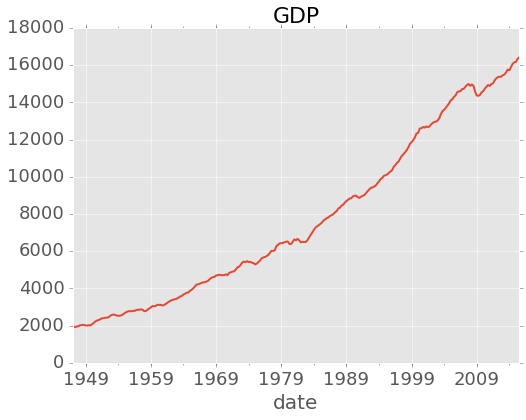

In [5]:
df['GDP'].plot(title='GDP')

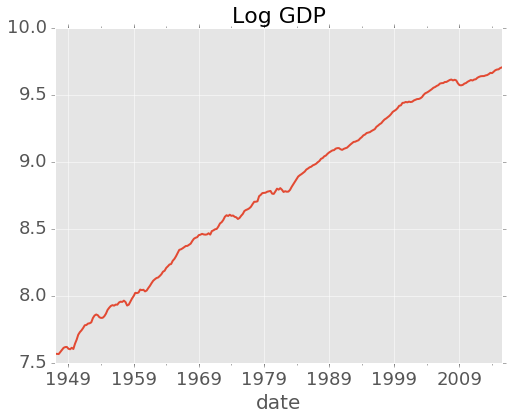

In [12]:
df['lGDP'] = np.log(df['GDP'])
df['lGDP'].plot(title='Log GDP')

# Growth Rate

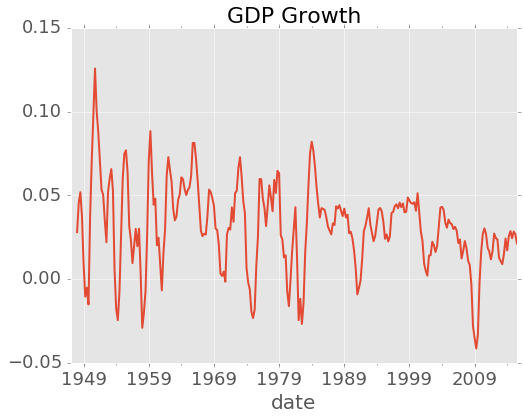

In [13]:
df['growth'] = df['lGDP'].diff(4) # annualized
df['growth'].plot(title='GDP Growth')

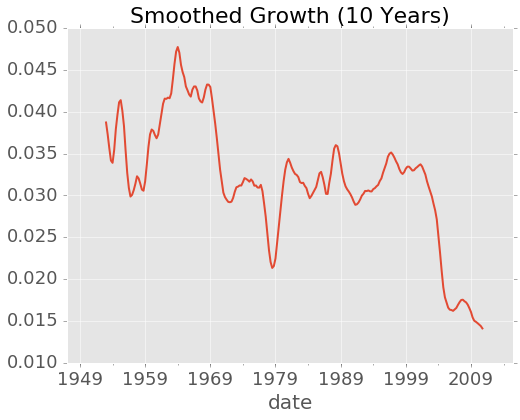

In [8]:
pd.rolling_mean(df['growth'],window=40,center=True).plot(title='Smoothed Growth (10 Years)')

# Volatility

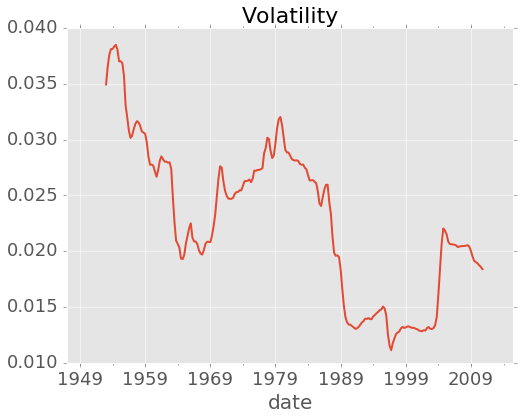

In [9]:
df['vol'] = pd.rolling_std(df['growth'],window=40,center=True)
df['vol'].plot(title='Volatility');

In [10]:
df['growth'].std()/df['growth'].mean()

0.8159113190988454

# Persistence

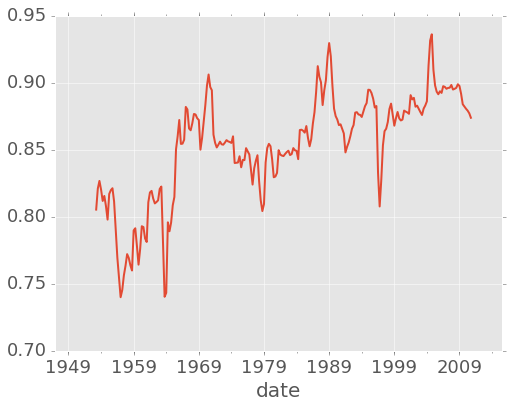

In [11]:
pd.rolling_corr(df['growth'],df['growth'].shift(),window=40,center=True).plot();